In [2]:
from PIL import Image, ImageDraw
import face_recognition
import os


In [7]:
def eye_cropper(folders, output_folder):
    # Establish count for iterative file saving
    count = 0

    # For loop going through each image file
    for folder in os.listdir(folders):
        for file in os.listdir(folders + '/' + folder):
          
            out_folder = output_folder + '/' + folder 

            if not os.path.exists(out_folder):
                os.makedirs(out_folder)

            # Using Facial Recognition Library on Image
            image = face_recognition.load_image_file(folders + '/' + folder + '/' + file)
            # create a variable for the facial feature coordinates
            face_landmarks_list = face_recognition.face_landmarks(image)
          
            # create a placeholder list for the eye coordinates
            eyes = []
            try:
                eyes.append(face_landmarks_list[0]['left_eye'])
                eyes.append(face_landmarks_list[0]['right_eye'])
            except:
                continue
            # establish the max x and y coordinates of the eye
            for eye in eyes:
                x_max = max([coordinate[0] for coordinate in eye])
                x_min = min([coordinate[0] for coordinate in eye])
                y_max = max([coordinate[1] for coordinate in eye])
                y_min = min([coordinate[1] for coordinate in eye])
              # establish the range of x and y coordinates    
                x_range = x_max - x_min
                y_range = y_max - y_min
              
                # to make sure the full eye is captured,
                # calculate the coordinates of a square that has 50%
                # cushion added to the axis with a larger range
                if x_range > y_range:
                    right = round(.5*x_range) + x_max
                    left = x_min - round(.5*x_range)
                    bottom = round(((right-left) - y_range))/2 + y_max
                    top = y_min - round(((right-left) - y_range))/2
                else:
                    bottom = round(.5*y_range) + y_max
                    top = y_min - round(.5*y_range)
                    right = round(((bottom-top) - x_range))/2 + x_max
                    left = x_min - round(((bottom-top) - x_range))/2
              
                #crop original image using the cushioned coordinates
                im = Image.open(folders + '/' + folder + '/' + file)
                im = im.crop((left, top, right, bottom))
                
                # resize image for input into our model
                im = im.resize((80,80))
              
                # save file to output folder
                im.save(out_folder + '/' + file)
                
                # increase count for iterative file saving
                count += 1
                # print count every 200 photos to monitor progress
                if count % 200 == 0:
                    print(count)
    
# Call function to crop full-face eye images
#eye_cropper('./data/manual_annotate/train', './data/cropped_1')
#eye_cropper('./data/manual_annotate/test', './data/test_cropped_1')

eye_cropper('/Users/mayank/Downloads/face_samples', '/Users/mayank/Downloads/face2')

In [4]:
def resize_image(folders, output_folder):
    # Establish count for iterative file saving
    count = 0

    # For loop going through each image file
    for folder in os.listdir(folders):
        for file in os.listdir(folders + '/' + folder):
          
            out_folder = output_folder + '/' + folder 

            if not os.path.exists(out_folder):
                os.makedirs(out_folder)

            
              
            #crop original image using the cushioned coordinates
            im = Image.open(folders + '/' + folder + '/' + file)
            
            
            # resize image for input into our model
            im = im.resize((80,80))
            
            # save file to output folder
            im.save(out_folder + '/' + file)
            
            # increase count for iterative file saving
            count += 1
            # print count every 200 photos to monitor progress
            if count % 200 == 0:
                print(count)
    

resize_image('./data/manual_annotate/test', './data/manual_annotate/test80')

Face found at coordinates: Top: 333, Right: 889, Bottom: 718, Left: 504


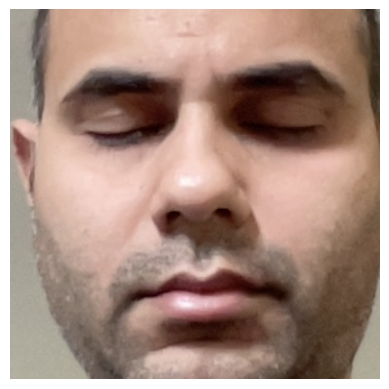

In [7]:
import cv2

# FILEPATH: /Users/mayank/Programs/mids_ml/mids/DriverDrowsiness/eye_extractor.ipynb
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
# Import the necessary libraries

# Load the image file
image = face_recognition.load_image_file('/Users/mayank/Downloads/face_samples/face/face2.jpg')

# Find the face locations in the image
face_locations = face_recognition.face_locations(image)

# Print the coordinates of each face
for face_location in face_locations:
    top, right, bottom, left = face_location
    print(f"Face found at coordinates: Top: {top}, Right: {right}, Bottom: {bottom}, Left: {left}")

    # Extract the face from the image
    face_image = image[top:bottom, left:right]

    # Display the face using Matplotlib
    plt.imshow(face_image)
    plt.axis('off')
    plt.show()



    # Save the face image
    image_path = '/Users/mayank/Downloads/image1.jpg'
    face_pil_image = Image.fromarray(face_image)
    face_pil_image.save(image_path)
    


